# This example demonstrate how to train region classification (standart image classification model).

In [1]:
import os
import sys
import torch
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# Nomeroff-Net path
NOMEROFF_NET_DIR = os.path.abspath('../../../../')
sys.path.append(NOMEROFF_NET_DIR)

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# # auto download latest dataset
# from nomeroff_net.tools import modelhub
# info = modelhub.download_dataset_for_model("numberplate_options")
# PATH_TO_DATASET = info["dataset_path"]

# local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

PATH_TO_REG_CUSTOM_DATASET = f'{PATH_TO_DATASET}_custom_reg'
PATH_TO_LINE_CUSTOM_DATASET = f'{PATH_TO_DATASET}_custom_line'

In [5]:
PATH_TO_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example'

In [6]:
PATH_TO_REG_CUSTOM_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg'

In [7]:
PATH_TO_LINE_CUSTOM_DATASET

'/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line'

In [8]:
DATASET_NAME = "options"
VERSION = f"{datetime.now().strftime('%Y_%m_%d')}_pytorch_lightning"

RESULT_PATH = os.path.join(NOMEROFF_NET_DIR, "./data/models/", 'numberplate_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [9]:
from nomeroff_net.tools import custom_options
from nomeroff_net import OptionsDetector

class_region_custom = [
    "eu-ua-2015",
    "eu-ua-2004",
    "eu-ua-1995",
    "eu",
    "xx-transit",
    "eu-ua-ordlo-dpr",
    "eu-ua-ordlo-lpr",
    "ge",
    "su"
]

class_count_lines_custom = ["1", "2", "3"]

state_ids_only_labels = ["not filled"]

customOptionsMakerReg = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_REG_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 2
)

customOptionsMakerCountLine = custom_options.CustomOptionsMaker(
    PATH_TO_DATASET,
    PATH_TO_LINE_CUSTOM_DATASET, 
    OptionsDetector.get_class_region_all(),
    class_region_custom,
    OptionsDetector.get_class_count_lines_all(),
    class_count_lines_custom,
    OptionsDetector.get_class_state_all(),
    state_ids_only_labels,
    items_per_class = 2
)

In [10]:
customOptionsMakerCountLine.make()

Creating path "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_line" for custom options
dir: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example option_dir: train custom_options_sub_dirs[0]: ann
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-2015-2.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-ordlo-lpr.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/kg.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/am.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-1995.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu.json
/mnt/data/var/www/nomeroff-net/./data/d

In [11]:
customOptionsMakerReg.make()

Creating path "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg" for custom options
dir: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example option_dir: train custom_options_sub_dirs[0]: ann
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-2015-2.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-ordlo-lpr.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/kg.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/am.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu-ua-1995.json
/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example/train/ann/eu.json
/mnt/data/var/www/nomeroff-net/./data/da

In [12]:
customOptionsMakerReg.rebalance_regions('train', with_aug=True, verbose=True)
customOptionsMakerCountLine.rebalance_count_lines('train', with_aug=True, verbose=True)

Prepare data for region_id: 0
Increase class region_id 0 from 3 to 10
Multiply 3 class data in 3 times and add random 1 items of class
Make full copy for index 1
Try make duplicate/augmentation for 3 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_1_eu-ua-2015-2.png"
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_1_eu-ua-2015-3.png"
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_1_eu-ua-2015.png"
Make full copy for index 2
Try make duplicate/augmentation for 3 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_2_eu-ua-2015-2.png"
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_o

Make full copy for index 6
Try make duplicate/augmentation for 1 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_6_eu-ua-ordlo-dpr.png"
Make full copy for index 7
Try make duplicate/augmentation for 1 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_7_eu-ua-ordlo-dpr.png"
Make full copy for index 8
Try make duplicate/augmentation for 1 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_8_eu-ua-ordlo-dpr.png"
Make full copy for index 9
Try make duplicate/augmentation for 1 items
Make augmented file: "/mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/train/img/aug_9_eu-ua-ordlo-dpr.png"
Add appendix (0 items) for index 10
Try make duplicate/augmentation for 0 it

1

In [13]:
# definde your parameters
class MyNpClassificator(OptionsDetector):
    def __init__(self):
        OptionsDetector.__init__(self)
        
        # outputs 2
        self.class_region = class_region_custom
        
        # output 3
        self.count_lines = class_count_lines_custom
        
        self.epochs           = 2
        self.batch_size       = 2
        
        # count gpu for train
        self.gpus = torch.cuda.device_count()
        
        self.height         = 64
        self.width         = 295


In [14]:
# initialize region detector.
npClassificator = MyNpClassificator()
npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=1)

  0%|          | 0/90 [00:00<?, ?it/s]

START PREPARING


100%|██████████| 11/11 [00:00<00:00, 258.22it/s]

DATA PREPARED


In [15]:
# train
lr_finder = npClassificator.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


/usr/local/lib/python3.8/site-packages/pytorch_lightning/loops/optimization/closure.py:35: LightningDeprecationWarning: One of the returned values {'progress_bar', 'log'} has a `grad_fn`. We will detach it automatically but this behaviour will change in v1.6. Please detach it manually: `return {'loss': ..., 'something': something.detach()}`
  rank_zero_deprecation(
Restoring states from the checkpoint path at /mnt/data/var/www/nomeroff-net/examples/ju/train/classification/lr_find_temp_model_ea1ba7c2-ebe9-4635-963b-4d0e05479070.ckpt
Failed to compute suggesting for `lr`. There might not be enough points.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/pytorch_lightning/tuner/lr_finder.py", line 176, in suggestion
    min_grad = np.gradient(loss).argmin()
  File "<__array_function__ internals>", line 5, in gradient
  File "/usr/local/lib64/python3.8/site-packages/numpy/lib/function_base.py", line 1041, in gradient
    raise ValueError(
ValueError: Shape 

Found lr: None


In [16]:
# train
model = npClassificator.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(



   | Name            | Type        | Params
-------------------------------------------------
0  | resnet          | Sequential  | 2.8 M 
1  | dropout_reg     | Dropout     | 0     
2  | fc1_reg         | Linear      | 10.0 M
3  | fc2_reg         | Linear      | 131 K 
4  | batch_norm_reg  | BatchNorm1d | 1.0 K 
5  | fc3_reg         | Linear      | 2.3 K 
6  | dropout_line    | Dropout     | 0     
7  | fc1_line        | Linear      | 10.0 M
8  | fc2_line        | Linear      | 131 K 
9  | batch_norm_line | BatchNorm1d | 1.0 K 
10 | fc3_line        | Linear      | 771   
-------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
91.898    Total estimated model params size (MB)


/usr/local/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:469: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(


In [17]:
npClassificator.prepare(PATH_TO_DATASET, verbose=1)

100%|██████████| 19/19 [00:00<00:00, 15733.82it/s]

START PREPARING
DATA PREPARED


In [18]:
npClassificator.save(RESULT_PATH)

model save to /mnt/data/var/www/nomeroff-net/./data/models/numberplate_options_2022_03_26_pytorch_lightning.ckpt


# Classification Report

In [19]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [20]:
from nomeroff_net.data_loaders import ImgGenerator
from sklearn.metrics import classification_report
import torch

def options_classification_report(npClassificator, 
                                  path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"), 
                                  mode_torch="gpu" if torch.cuda.device_count() else "cpu"):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    imageGenerator.build_data()
    gen = imageGenerator.path_generator()
    
    out_idx_reg_all = []
    out_idx_line_all = []
    label_idx_reg_all = []
    label_idx_line_all = []
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
            npClassificator.model.cuda()
        with torch.no_grad():
            outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        out_idx_reg_all.extend(out_idx_reg)
        out_idx_line_all.extend(out_idx_line)
        label_idx_reg_all.extend(label_idx_reg)
        label_idx_line_all.extend(label_idx_line)
    #print("npClassificator.class_region", npClassificator.class_region)
    print("\n\nclass region classification report:")
    print(classification_report(label_idx_reg_all, 
                                out_idx_reg_all, 
                                target_names=npClassificator.get_class_region_for_report()))
    print("\n\ncount lines classification report:")
    print(classification_report(label_idx_line_all, 
                                out_idx_line_all, 
                                target_names=npClassificator.count_lines))

In [21]:
options_classification_report(npClassificator)

100%|██████████| 11/11 [00:00<00:00, 14032.04it/s]



class region classification report:
                 precision    recall  f1-score   support

     eu-ua-2015       1.00      0.50      0.67         4
     eu-ua-2004       1.00      1.00      1.00         1
     eu-ua-1995       1.00      1.00      1.00         1
             eu       1.00      1.00      1.00         1
     xx-transit       1.00      1.00      1.00         1
eu-ua-ordlo-dpr       0.00      0.00      0.00         1
eu-ua-ordlo-lpr       0.50      1.00      0.67         1
             ge       0.33      1.00      0.50         1
             su       1.00      1.00      1.00         1

       accuracy                           0.75        12
      macro avg       0.76      0.83      0.76        12
   weighted avg       0.82      0.75      0.74        12



count lines classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3      

# Fine-tuning regions

In [22]:
# npClassificator.train_regions = True
# npClassificator.train_count_lines = False
# npClassificator.epochs = 20

In [23]:
# npClassificator.prepare(PATH_TO_REG_CUSTOM_DATASET, verbose=1, num_workers=24)

In [24]:
# npClassificator.load(RESULT_PATH)

In [25]:
# # train
# model = npClassificator.train()

In [26]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [27]:
# npClassificator.save(RESULT_PATH)

In [28]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

# Fine-tuning regions

In [29]:
# npClassificator.train_regions = False
# npClassificator.train_count_lines = True
# npClassificator.epochs = 20

In [30]:
# npClassificator.prepare(PATH_TO_LINE_CUSTOM_DATASET, verbose=1, num_workers=24)

In [31]:
# npClassificator.load(RESULT_PATH)

In [32]:
# # train
# model = npClassificator.train()

In [33]:
# npClassificator.prepare(PATH_TO_DATASET, verbose=1)
# npClassificator.test()

In [34]:
# npClassificator.save(RESULT_PATH)

In [35]:
# options_classification_report(npClassificator, path_dir=os.path.join(PATH_TO_LINE_CUSTOM_DATASET, "test"))

# Check small accuracy images

In [36]:
npClassificator.load(RESULT_PATH)

NPOptionsNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [37]:
%matplotlib inline

In [43]:
from nomeroff_net.data_loaders import ImgGenerator
import torch
import json
import cv2
import matplotlib.pyplot as plt

def show_img(img_path):
    img = cv2.imread(img_path)
    img = img[..., ::-1]
    plt.imshow(img)
    plt.show()

def mark_for_moderation(p):
    json_filepath = p.replace('/img/','/ann/').replace('.png','.json')
    item_data = json.load(open(json_filepath, 'r'))
    if not item_data['moderation']:
        item_data['moderation'] = { "moderatedBy": "dimabendera" }
    item_data['moderation']["isModerated"] = 0
    with open(json_filepath, "w") as json_file:
        json.dump(item_data, json_file)
    
    
def small_acc(npClassificator, 
              path_dir=os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"), 
              mode_torch="gpu" if torch.cuda.device_count() else "cpu", 
              min_acc=0.75):
    imageGenerator = ImgGenerator(
        path_dir,
        npClassificator.width,
        npClassificator.height,
        npClassificator.batch_size,
        [len(npClassificator.class_region), len(npClassificator.count_lines)])
    print("start imageGenerator build")
    imageGenerator.build_data()
    print("end imageGenerator build")
    gen = imageGenerator.path_generator()

# (npClassificator, 
#               path_dir=os.path.join(PATH_TO_DATASET, "test"), 
#               mode_torch="gpu", 
#               min_acc=0.75):
#     imageGenerator = ImgGenerator(
#         path_dir,
#         npClassificator.width,
#         npClassificator.height,
#         npClassificator.batch_size,
#         [len(npClassificator.class_region), len(npClassificator.count_lines)])
#     print("start imageGenerator build")
#     imageGenerator.build_data()
#     print("end imageGenerator build")
#     gen = imageGenerator.path_generator()
    cnt = 0
    cnt_all = 0
    for i, (img_paths, inputs, labels) in enumerate(gen, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs = torch.from_numpy(inputs)
        if mode_torch == "gpu":
            inputs = inputs.cuda()
        outputs = npClassificator.model(inputs)
        label_reg = torch.from_numpy(labels[0])
        label_cnt = torch.from_numpy(labels[1])
        if mode_torch == "gpu":
            label_reg = label_reg.cuda()
            label_cnt = label_cnt.cuda()
        out_idx_reg = torch.max(outputs[0], 1)[1].cpu().numpy()
        out_idx_line = torch.max(outputs[1], 1)[1].cpu().numpy()
        
        label_idx_reg = torch.max(label_reg, 1)[1].cpu().numpy()
        label_idx_line = torch.max(label_cnt, 1)[1].cpu().numpy()
        
        cnt_all += 1
        # check reg
        for o, l, p, tens in zip(out_idx_reg, label_idx_reg, img_paths, outputs[0]):
            if o != l:
                print("[WRONG REGION PREDICTED] pred {}[{}] -> {}[{}] source: {}".format(o,npClassificator.class_region[o], l, npClassificator.class_region[l], p))
                #mark_for_moderation(p)
                show_img(p)
                cnt += 1
    print("Wrong detection: {} numberplates of {}".format(cnt, cnt_all))
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC REGION PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
        # check line
#         for o, l, p, tens in zip(out_idx_line, label_idx_line, img_paths, outputs[1]):
#             if o != l:
#                 print("[WRONG LINE PREDICTED]  pred", o, l, p)
#                 show_img(p)
#             elif tens[l] < min_acc:
#                 print("[SMALL ACC LINE PREDICTED]  pred", o, l, tens[l], p)
#                 show_img(p)
    

100%|██████████| 11/11 [00:00<00:00, 2689.13it/s]

start imageGenerator build
end imageGenerator build
[WRONG REGION PREDICTED] pred 7[ge] -> 0[eu-ua-2015] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/test/img/eu-ua-2015.png


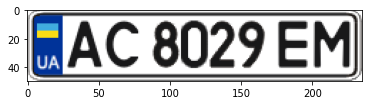

[WRONG REGION PREDICTED] pred 7[ge] -> 0[eu-ua-2015] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/test/img/eu-ua-2015.png


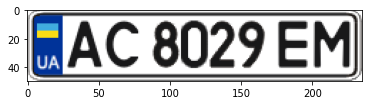

[WRONG REGION PREDICTED] pred 6[eu-ua-ordlo-lpr] -> 5[eu-ua-ordlo-dpr] source: /mnt/data/var/www/nomeroff-net/./data/dataset/OptionsDetector/numberplate_options_example_custom_reg/test/img/eu-ua-ordlo-dpr.png


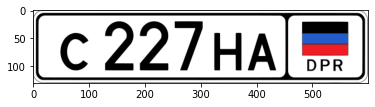

Wrong detection: 3 numberplates of 6


In [44]:
small_acc(npClassificator, os.path.join(PATH_TO_REG_CUSTOM_DATASET, "test"))

In [41]:
#small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "train"))

In [42]:
#small_acc(npClassificator, os.path.join(PATH_TO_TMP_CUSTOM_DATASET, "val"))